<a href="https://colab.research.google.com/github/Ayazdani1997/AI-Spring-99-CA5/blob/master/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import numpy as np
import random


import torch.nn as nn
import torch.nn.functional as F


import time
from datetime import timedelta
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 1: Define transform classes, instantiating transform objects and instantiating the dataset.

In [ ]:


class CustomToTensor(object):
    """Convert PIL Images in sample to pytorch Tensors."""
    
    ## the input image must be grayscaled first
    def __call__(self, image):
        image = np.array(image, dtype=np.float32)/255
        # numpy image: H x W
        return torch.from_numpy(image)

In [ ]:
transform = transforms.Compose([transforms.Grayscale(),
                                CustomToTensor()
                               ]
                              ) ## composes multiple transforms into single one

dataset = ImageFolder("/content/drive/My Drive/categorized_products" ,transform=transform)

In [ ]:
classes = dataset.classes
print(classes)

['Accessory Gift Set', 'Backpacks', 'Belts', 'Capris', 'Caps', 'Casual Shoes', 'Clutches', 'Cufflinks', 'Deodorant', 'Dresses', 'Dupatta', 'Earrings', 'Flats', 'Flip Flops', 'Formal Shoes', 'Handbags', 'Heels', 'Innerwear Vests', 'Jackets', 'Jeans', 'Kajal and Eyeliner', 'Kurtas', 'Kurtis', 'Leggings', 'Lip Gloss', 'Lipstick', 'Nail Polish', 'Necklace and Chains', 'Night suits', 'Nightdress', 'Pendant', 'Perfume and Body Mist', 'Ring', 'Sandals', 'Sarees', 'Scarves', 'Shirts', 'Shorts', 'Skirts', 'Socks', 'Sports Shoes', 'Sunglasses', 'Sweaters', 'Sweatshirts', 'Ties', 'Tops', 'Track Pants', 'Trousers', 'Tshirts', 'Tunics', 'Wallets', 'Watches']


Step 2: Split Dataset and Make it Iterable

In [ ]:
batch_size = 64
validation_split = 0.2


indices = list(range(len(dataset))) # indices of the dataset
print(len(indices))

# TODO: split the dataset into train and test sets randomly with split of 0.2 and assign their indices in the original set to train_indices and test_indices 
targets = dataset.targets
train_indices, test_indices = train_test_split(indices, test_size=0.2, train_size=0.8 , stratify=targets, random_state=42)
print(len(train_indices), len(test_indices))

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=16)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=16)

37249
29799 7450


In [ ]:
print(len(train_loader), len(test_loader))

466 117


In [ ]:
def get_number_distribution(loader, classes):
  total_category_count = {classes[i] : 0 for i in range(len(classes))}
  for _, labels in loader:
    for label in labels:
      total_category_count[ classes[label] ] += 1
  categories = []
  for category in classes:
    categories.append({'category' : category, 'count' : total_category_count[category]})
    print('%s : %d' % (category, total_category_count[category]))
  print(categories)

  def myFunc(e):
    return e['count']
  categories.sort(reverse=True, key=myFunc) 
  categories_names = []
  categories_count = []
  for i in categories:
    categories_names.append(i['category'])
    categories_count.append(i['count'])

  objects = categories_names
  y_pos = np.arange(len(objects))
  performance = list(categories_count)

  plt.figure(figsize=(len(categories_names) + 100, len(categories_names)/3), facecolor='b', edgecolor='b')
  plt.bar(y_pos, performance, align='center', alpha=0.5)
  plt.yticks(fontsize=50)
  plt.xticks(y_pos, objects, fontsize=30)
  plt.ylabel('Class Count', fontsize=50)
  plt.title('Class Distribution' , fontsize=50)

  plt.show()

For Train: 
Accessory Gift Set : 89
Backpacks : 578
Belts : 650
Capris : 140
Caps : 226
Casual Shoes : 2277
Clutches : 232
Cufflinks : 85
Deodorant : 278
Dresses : 371
Dupatta : 93
Earrings : 334
Flats : 400
Flip Flops : 733
Formal Shoes : 510
Handbags : 1406
Heels : 1058
Innerwear Vests : 193
Jackets : 206
Jeans : 486
Kajal and Eyeliner : 82
Kurtas : 1475
Kurtis : 187
Leggings : 142
Lip Gloss : 115
Lipstick : 252
Nail Polish : 263
Necklace and Chains : 128
Night suits : 113
Nightdress : 151
Pendant : 140
Perfume and Body Mist : 490
Ring : 94
Sandals : 718
Sarees : 339
Scarves : 94
Shirts : 2570
Shorts : 438
Skirts : 102
Socks : 549
Sports Shoes : 1628
Sunglasses : 858
Sweaters : 222
Sweatshirts : 228
Ties : 209
Tops : 1409
Track Pants : 242
Trousers : 424
Tshirts : 2827
Tunics : 183
Wallets : 749
Watches : 2033
[{'category': 'Accessory Gift Set', 'count': 89}, {'category': 'Backpacks', 'count': 578}, {'category': 'Belts', 'count': 650}, {'category': 'Capris', 'count': 140}, {'category

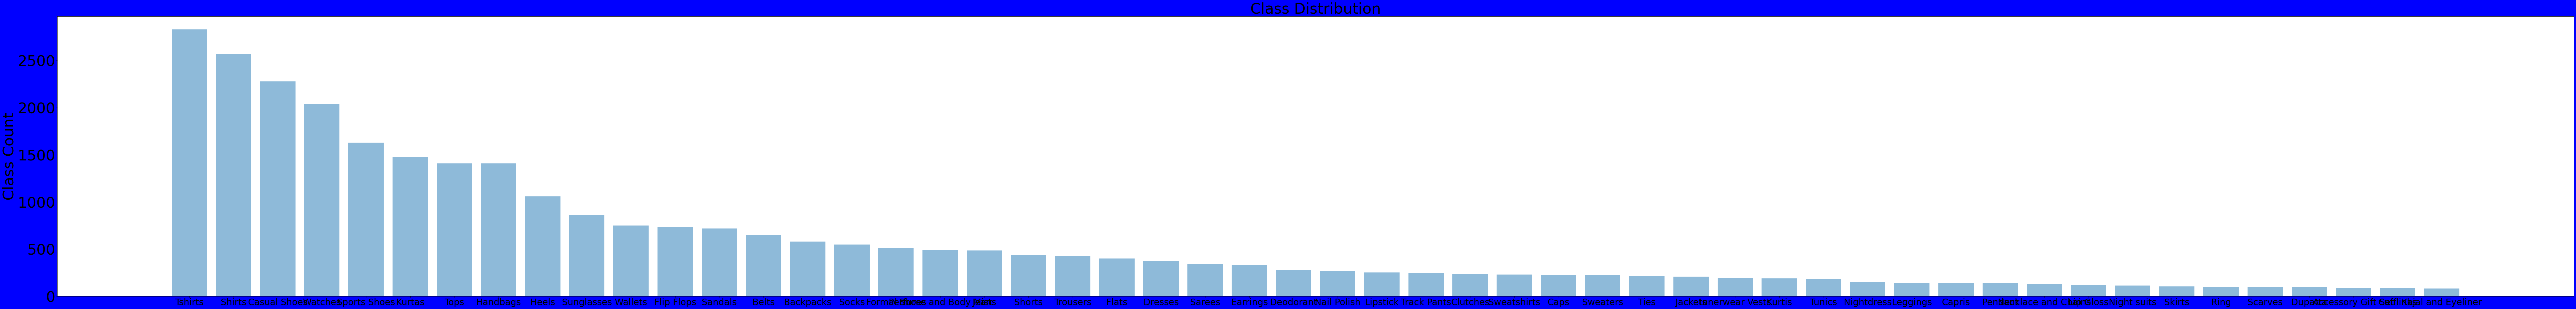

In [ ]:
print("For Train: ")
get_number_distribution(train_loader, classes)

For Test: 
Accessory Gift Set : 22
Backpacks : 144
Belts : 163
Capris : 35
Caps : 57
Casual Shoes : 569
Clutches : 58
Cufflinks : 21
Deodorant : 69
Dresses : 93
Dupatta : 23
Earrings : 83
Flats : 100
Flip Flops : 183
Formal Shoes : 127
Handbags : 351
Heels : 265
Innerwear Vests : 48
Jackets : 52
Jeans : 122
Kajal and Eyeliner : 20
Kurtas : 369
Kurtis : 47
Leggings : 35
Lip Gloss : 29
Lipstick : 63
Nail Polish : 66
Necklace and Chains : 32
Night suits : 28
Nightdress : 38
Pendant : 35
Perfume and Body Mist : 123
Ring : 24
Sandals : 179
Sarees : 85
Scarves : 23
Shirts : 643
Shorts : 109
Skirts : 26
Socks : 137
Sports Shoes : 407
Sunglasses : 215
Sweaters : 55
Sweatshirts : 57
Ties : 52
Tops : 353
Track Pants : 61
Trousers : 106
Tshirts : 707
Tunics : 46
Wallets : 187
Watches : 508
[{'category': 'Accessory Gift Set', 'count': 22}, {'category': 'Backpacks', 'count': 144}, {'category': 'Belts', 'count': 163}, {'category': 'Capris', 'count': 35}, {'category': 'Caps', 'count': 57}, {'category

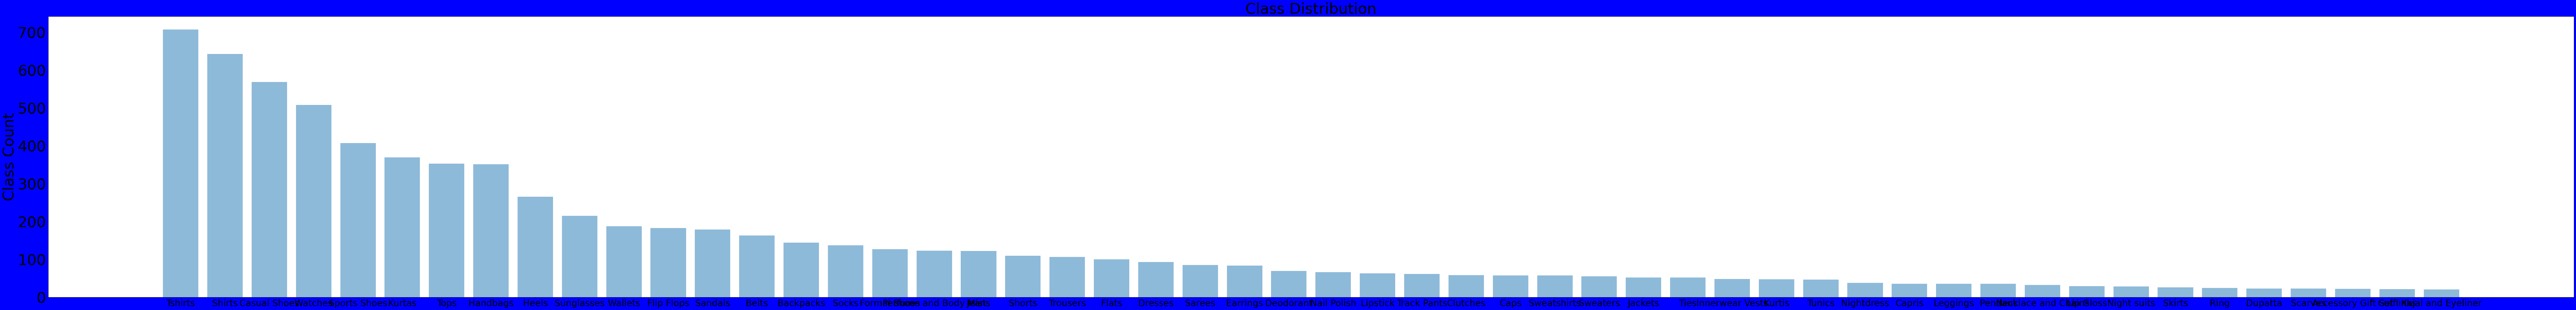

In [ ]:
print("For Test: ")
get_number_distribution(test_loader, classes)

<Figure size 864x144 with 0 Axes>

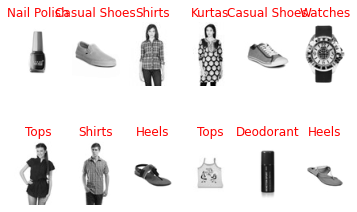

In [ ]:
def imshow(img_array, labels, classes):
    plt.figure(figsize=(12, 2))
    _, axs = plt.subplots(2, 6) 
    # axs.set_facecolor('b')
    for i in range(2):
      for j in range(6):
        axs[i][j].imshow(img_array[i * 6 + j], cmap='gray')
        title_obj = axs[i][j].set_title(classes[labels[i * 6 + j]])
        plt.setp(title_obj, color='r')    
        axs[i][j].axis('off')
    plt.show()

data_iter = iter(train_loader)
data_iter.next()
images, labels = data_iter.next()

imshow(images[0:12], labels[0:12], classes)

In [ ]:
print(len(images))
print(len(classes))

64
52


In [ ]:
class Model(nn.Module):
    def __init__(self, class_num, act=F.relu):
        super(Model, self).__init__()


        self.layer1 = nn.Linear(4800, 4800)
        self.act1 = act


        self.layer2 = nn.Linear(4800, 6000)
        self.act2 = act


        self.layer3 = nn.Linear(6000, 7500)
        self.act3 = act


        self.layer4 = nn.Linear(7500, 3000)
        self.act4 = act


        self.layer5 = nn.Linear(3000, 1920)
        self.act5 = act


        self.layer6 = nn.Linear(1920, 200)
        self.act6 = act


        self.layer7 = nn.Linear(200, class_num)
        # self.act3 = F.softmax(dim=1)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        x = self.act6(x)


        x = self.layer7(x)
        # x = self.act3(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = Model(len(classes), act=F.relu)

model = model.to(device)

In [ ]:
# model.layer1.weight.data.fill_(0)
# model.layer2.weight.data.fill_(0)
# model.layer3.weight.data.fill_(0)
# model.layer4.weight.data.fill_(0)
# model.layer5.weight.data.fill_(0)
# model.layer6.weight.data.fill_(0)
# model.layer7.weight.data.fill_(0)
# model.layer1.bias.data.fill_(0)
# model.layer2.bias.data.fill_(0)
# model.layer3.bias.data.fill_(0)
# model.layer4.bias.data.fill_(0)
# model.layer5.bias.data.fill_(0)
# model.layer6.bias.data.fill_(0)
# model.layer7.bias.data.fill_(0)

In [ ]:
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5, weight_decay=0.01)

In [ ]:
def fit(model, train_loader, device, criterion, optimizer, num_epochs=10):

  total_time = 0.
  average_loss_history = []
  for epoch in range(num_epochs):
      train_loss = 0.
      d1 = datetime.now()
      for images, labels in train_loader:
          
        images = images.to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        train_loss += loss.item()

      average_loss = train_loss / len(train_loader)
      average_loss_history.append(average_loss)
      d2 = datetime.now()
      delta = d2 - d1
      seconds = float(delta.total_seconds())
      total_time += seconds
      print('epoch %d, train_loss: %.6f, time elapsed: %s seconds' % (epoch + 1, average_loss, seconds))
  print('total training time: %.3f minutes' % (total_time / 60))
  return average_loss_history

In [ ]:
def test_model_accuracy(model, test_loader):
    # Calculate Accuracy         
    correct = 0.
    total = 0.
    # Iterate through test dataset
    with torch.no_grad():
      for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to('cpu') == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy: {}%'.format(accuracy))

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model)

+---------------+------------+
|    Modules    | Parameters |
+---------------+------------+
| layer1.weight |  23040000  |
|  layer1.bias  |    4800    |
| layer2.weight |  28800000  |
|  layer2.bias  |    6000    |
| layer3.weight |  45000000  |
|  layer3.bias  |    7500    |
| layer4.weight |  22500000  |
|  layer4.bias  |    3000    |
| layer5.weight |  5760000   |
|  layer5.bias  |    1920    |
| layer6.weight |   384000   |
|  layer6.bias  |    200     |
| layer7.weight |   10400    |
|  layer7.bias  |     52     |
+---------------+------------+
Total Trainable Params: 125517872


125517872

In [ ]:
average_loss_history = fit(model, train_loader, device, criterion, optimizer)

epoch 1, train_loss: 3.475443, time elapsed: 44.219985 seconds
epoch 2, train_loss: 3.351666, time elapsed: 44.415506 seconds
epoch 3, train_loss: 3.032493, time elapsed: 44.208501 seconds
epoch 4, train_loss: 3.160555, time elapsed: 44.18392 seconds
epoch 5, train_loss: 3.139263, time elapsed: 44.019649 seconds
epoch 6, train_loss: 3.183616, time elapsed: 43.940685 seconds
epoch 7, train_loss: 2.857849, time elapsed: 43.747722 seconds
epoch 8, train_loss: 2.900295, time elapsed: 44.278771 seconds
epoch 9, train_loss: 3.139984, time elapsed: 43.352659 seconds
epoch 10, train_loss: 3.237772, time elapsed: 43.676177 seconds
total training time: 7.334 minutes


In [ ]:
print("Test Accuracy is: ")
test_model_accuracy(model, test_loader)
print("Train Accuracy is: ")
test_model_accuracy(model, train_loader)

Test Accuracy is: 
Accuracy: 9.48993288590604%
Train Accuracy is: 
Accuracy: 9.48689553340716%


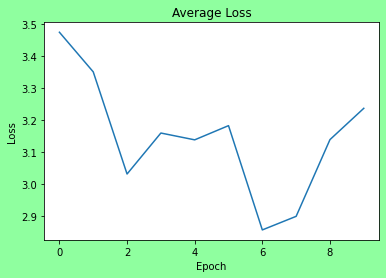

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.plot(average_loss_history)
plt.title("Average Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Accuracy of Accessory Gift Set : 0.0 / 22.0 = 0.0000 %
Accuracy of Backpacks : 0.0 / 144.0 = 0.0000 %
Accuracy of Belts : 0.0 / 163.0 = 0.0000 %
Accuracy of Capris : 0.0 / 35.0 = 0.0000 %
Accuracy of Caps : 0.0 / 57.0 = 0.0000 %
Accuracy of Casual Shoes : 0.0 / 569.0 = 0.0000 %
Accuracy of Clutches : 0.0 / 58.0 = 0.0000 %
Accuracy of Cufflinks : 0.0 / 21.0 = 0.0000 %
Accuracy of Deodorant : 0.0 / 69.0 = 0.0000 %
Accuracy of Dresses : 0.0 / 93.0 = 0.0000 %
Accuracy of Dupatta : 0.0 / 23.0 = 0.0000 %
Accuracy of Earrings : 0.0 / 83.0 = 0.0000 %
Accuracy of Flats : 0.0 / 100.0 = 0.0000 %
Accuracy of Flip Flops : 0.0 / 183.0 = 0.0000 %
Accuracy of Formal Shoes : 0.0 / 127.0 = 0.0000 %
Accuracy of Handbags : 0.0 / 351.0 = 0.0000 %
Accuracy of Heels : 0.0 / 265.0 = 0.0000 %
Accuracy of Innerwear Vests : 0.0 / 48.0 = 0.0000 %
Accuracy of Jackets : 0.0 / 52.0 = 0.0000 %
Accuracy of Jeans : 0.0 / 122.0 = 0.0000 %
Accuracy of Kajal and Eyeliner : 0.0 / 20.0 = 0.0000 %
Accuracy of Kurtas : 0.0 / 

Text(0.5, 1.0, 'Class Distribution')

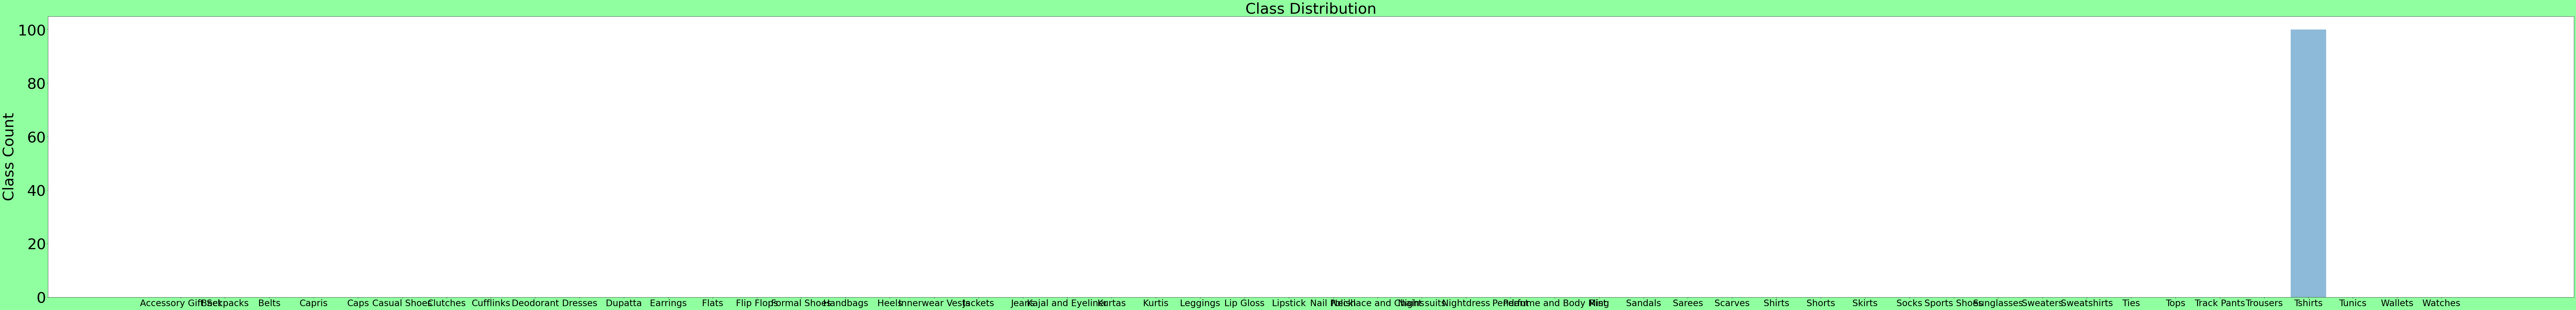

In [ ]:
 class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

for data in test_loader:
    inputs, labels = data
    outputs = model(inputs.to(device))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted.to('cpu') == labels.data).squeeze()

    # print(labels.data, len(labels.data))
    for i in range(len(labels.data)):
        label = labels.data[i]
        class_correct[label] += c[i]
        class_total[label] += 1

accuracy = []
for i in range(52):
  accuracy.append(100 * class_correct[i].item() / class_total[i])
  print('Accuracy of {} : {} / {} = {:.4f} %'.format(classes[i], class_correct[i], class_total[i], 100 * class_correct[i].item() / class_total[i]))


objects = classes
y_pos = np.arange(len(objects))
performance = accuracy

fig = plt.figure(figsize=(len(classes) + 100, len(classes)/3))
fig.patch.set_facecolor('xkcd:mint green')
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.yticks(fontsize=50)
plt.xticks(y_pos, objects, fontsize=30)
plt.ylabel('Class Count', fontsize=50)
plt.title('Class Distribution' , fontsize=50)